# Practical session 4: Modulating internal states and Sensing other agent's attributes

In the last practical session, we saw how to run multiple behaviors in parallel on multiple agents. In this section we will see more advanced methods for combining behaviors by modulating their activations according to internal states of the agent and by allowing them to sense the attributes of others. In order to start with a clean basis, let's first provide the definition of several behaviors. These four behaviors are simply implementations of the [Braitenberg vehicles](https://docs.google.com/presentation/d/1s6ibk_ACiJb9CERJ_8L_b4KFu9d04ZG_htUbb_YSYT4/edit#slide=id.g31e1b425a3_0_0) we have seen in class, where the `sensed_entities` (i.e. what is sensed by the proximeters) are other `agents`:

In [1]:
def fear(agent):
    left, right = agent.sensors(sensed_entities=["agents"])
    left_wheel = left
    right_wheel = right
    return left_wheel, right_wheel

def aggression(agent):
    left, right = agent.sensors(sensed_entities=["agents"])
    left_wheel = right
    right_wheel = left
    return left_wheel, right_wheel

def love_cuddly(agent):
    left, right = agent.sensors(sensed_entities=["agents"])
    left_wheel = 1 - left
    right_wheel = 1 - right   
    return left_wheel, right_wheel

def love_shy(agent):
    left, right = agent.sensors(sensed_entities=["agents"])
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel

Note that the arguments of the behavior functions above, `agent` is arbitrary name. We choose here to call it `agent` in order to avoid a confusion when dealing with multiple agents. The only important thing is that you use the same name in the argument and in the function body.

We define a fifth behavior for obstacle avoidance, where obstacles are objects little and big squares, named `s_obstacles` and `b_obstacles`.

In [2]:
def obstacle_avoidance(agent):
    left, right = agent.sensors(sensed_entities=["s_obstacles", "b_obstacles"])
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel

**Reminder:** First import the functions `start_server_and_interface` and `stop_server_and_interface`, and the `NotebookController` class. Start the server and interface for this session, and create a controller object to interact with the simulation.

In [ ]:
from vivarium.controllers.notebook_controller import NotebookController
from vivarium.utils.handle_server_interface import start_server_and_interface, stop_server_and_interface

In [ ]:
start_server_and_interface(scene_name="session_4")

In [ ]:
controller = NotebookController()
controller.run()

## Emergent behaviors

When running one or several behaviors on a agent, you might observe behavioral responses that are not present in any of the behavior definitions. This usually doesn't mean that there is a bug, it could just be the result of an emergent behavioral property. Let's analyze this on a quick example you may have already seen in session 3, by running the `obstacle_avoidance` behavior on each agent:

In [ ]:
# attach the behavior avoidance to all agents and check the behaviors
for agent in controller.agents:
    agent.attach_behavior(obstacle_avoidance)
    agent.print_behaviors()

This session's environment contains more entities than previous ones, which might slow down the simulation. To speed it up, you can increase the number of steps the simulation performs on the server for each step done by the controller. To do this, open the `SIMULATOR` panel in the web interface and find the `num_steps_lax` parameter. It is set to 6 by default; you can increase it to 20 to see if the simulation runs faster. Make sure to use this mechanism wisely, as increasing this number too much might lead to a simulation that is less reactive to your commands.

**Q1:** You will observe that the 3 agents of the scene seem to be attracted to objects that are not handled by the behavior (e.g. other agents or resources). Analyse this phenomena and explain below why it is occuring in a few lines:

*Double click on this cell to enter your answer*

## Analyzing agents interactions

First, let's detach all the agent's behaviors and stop their motors.

In [7]:
for agent in controller.agents:
    agent.detach_all_behaviors(stop_motors=True)

Let's now analyze the interaction between two agents that are equipped with different behaviors. First assign a variable to all agents of the simulation so we can easily access them indivually in the next steps. As we saw in previous sessions, the `controller.agents` is a list, and we can access its elements with Python indexing system (0 corresponding to the first element, 1 to the second etc). We will only consider the first the agents (index 0 and 1) for this analysis. 

In [8]:
agent_0 = controller.agents[0]
agent_1 = controller.agents[1]
agent_2 = controller.agents[2]

To differentiate the agents, we will also assign them different colors:

In [9]:
agent_0.color = "blue"
agent_1.color = "cyan"
agent_2.color = "black"

**Q2:** In addition to the `obstacle_avoidance` behavior, run several combinations of the four other behaviors defined above. For example, run `obstacle_avoidance` and `fear` on `agent_0` ; and `obstacle_avoidance` and `aggression` on `agent_1`. Keep the `agent_2` still for the moment. Find two of these combinations that you consider as interesting (e.g. because they result in a relatively complex interaction pattern, or because they can be linked to animal behavior) and describe them in a few lines:

In [83]:
# Your code here

*Your answer here*

## Weighting behaviors

As we have seen in the previous sesssion and the last exercice, it is possible to run several behaviors in parallel on the same agent. When doing it, the motor activation sent to each wheel corresponds to the average of the motor activation returned by each behavior (this averaging is implemented internally, you don't need to worry about it). 

It is also possible to specify the weight of each running behavior, i.e. how much it will count in the averaging. This is done by returning three values in the function defining a behavior (instead of two as we were doing until now: one for the left wheel activation and one for the right one). For example, if we want to run the `obstacle_avoidance` behavior with a weight of 1 and the `fear` behavior with a weight of 0.5 on `agent_2`, we write:

In [13]:
agent_2.attach_behavior(obstacle_avoidance, weight=1)
agent_2.attach_behavior(fear, weight=0.5)

It might be hard to effectively see the weights in action for these two behaviors as they both lead the agent to avoid other entities. In order to better visualize the effect of the weights, we will define two new behaviors with opposite effects: `aggress_all` and `avoid_all`. The `aggress_all` behavior will make the agent move towards the sensed entities, while the `avoid_all` behavior will make it move away from them. We will add a bigger weight to the `aggress_all` behavior than to the `avoid_all` behavior, and observe the agent's behavior.

In [15]:
def aggress_all(agent):
    left, right = agent.sensors()
    left_wheel = right
    right_wheel = left  
    return left_wheel, right_wheel

def avoid_all(agent):
    left, right = agent.sensors()
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel

In [16]:
agent_2.detach_all_behaviors()
agent_2.attach_behavior(aggress_all, weight=1)
agent_2.attach_behavior(avoid_all, weight=0.2)

**Q3:** What are the effects of the weights on the agent's behavior? Why does it keep moving even when it doesn't sense anything ? Describe the observed behavior in a few lines:

*Your answer here*

By doing this, the wheel activations returned by the `agress_all` behavior will have more weight than those returned by the `avoid_all` behavior. For example, if `avoid_all` returns 0.6 for the left wheel, and `agress_all` returns 0.9, then the total activation of that wheel will be $(0.6 * 0.2 + 0.9 * 1) / (0.2 + 1) = 0.85$ (i.e. the average of both values weighted by their respective activation). Note that when no weight is provided in a behavior definition (i.e. when the behavior function returns only two values as usual), the corresponding behavior is set with a default weight of 1.

## Weighting behaviors according to internal states

This weighting is particularly useful to activate a behavior according to some internal states of the agent. Let's consider a agent that eats resourcess (as in the previous session) and that eating those resourcess allows to raise a simulated energy level of the agent. We want to continuously compute the energy level of the agent according to how much resourcess it has recently eaten. To do so, we first need a way to know when a agent has eaten for the last time. There are several ways of doing this that can serve in different use cases:

- agent.has_eaten(): function that tells if the agent has eaten since the last call to this function, defaults to False
- agent.time_since_feeding: attribute that tells the time since the last meal, defaults to infinity when the agent has never eaten
- agent.has_eaten_since(t): function that tells if the agent has eaten since time t

In [ ]:
print(f"agent 0: -ate: {agent_0.has_eaten()} -time since feeding: {agent_0.time_since_feeding}")

We can see than when agents haven't started eating, the time since feeding is infinite (`inf`), and the `has_eaten` function returns False. When they start eating, the time since feeding is reset to 0, and the `has_eaten` function returns True.

We can also check this for all agents of the scene at once:

In [ ]:
for agent in controller.agents:
    print(f"agent {agent.idx}: -ate: {agent.has_eaten()} -time since feeding: {agent.time_since_feeding}")

To make this more interesting, let's start the eating mechanism and the spawning of resources as in session 3. Then we will use the same cell as before to check how `time_since_feeding` and `has_eaten` evolve for all agents. Additionally, attach both the `obstacle avoidance` and the `foraging` behavior on the agents, and execute the cell above at different times to understand correctly how the `has_eaten`function and `time_since_deefing` attribute work. Remember we have already defined a `foraging_behavior` in the last session, which can be implemented like this:

In [25]:
def foraging(agent):
    left, right = agent.sensors(sensed_entities=["resources"])
    left_activation = right
    right_activation = left
    return left_activation, right_activation

**Q4:** Remove the current behaviors of all the agents and replace them with `obstacle_avoidance` and `foraging`. Then, make sure they are correctly attached with the `print_behaviors` function of the agents.

In [ ]:
# your code here

Now, let's verify the subtypes list of the controller and the FPS of the simulation loop, in order to choose our parameters for the `start_resources_apparition` function of the controller and the `diet` of the agents.

In [ ]:
print("Subtypes in the environment:")
controller.print_subtypes_list()

print("\nFPS of the controller:")
controller.print_fps()

First, add `resources` to the diet of the agents.

In [30]:
# Add resources to the agents diet
for agent in controller.agents:
    agent.diet = ["resources"]

Then, start the resources apparition and eating mechanisms. Choose your resources spawning execution interval apparition according to the FPS of the simulation loop. For example, if the FPS is 20, you can set the interval to 100 to spawn resources every 5 seconds.

In [31]:
# Start resources apparition and eating mechanism
controller.start_resources_apparition(interval=50)
controller.start_eating_mechanism(interval=10)

Now observe the evolution of the `time_since_feeding` and `has_eaten` attributes of all agents. You can execute the cell below several times to see how the attributes evolve over time. Try to understand how they both work. 

In [ ]:
for agent in controller.agents:
    print(f"agent {agent.idx}: -ate: {agent.has_eaten()} -time since feeding: {agent.time_since_feeding}")

Now we want to continuously compute the energy level of a agent, so that the level decreases slowly when nothing is eaten and increases whenever food is consumed. This can be done by attaching and starting a *routine* to a agent. The definition of a routine is very similar to the definition of a behavior, except that it doesn't return any value (whereas a behavior always returns the left and right wheel activations, and optionally a weight). Thus, a routine corresponds to a set of instructions that are executed at a particular interval (as in a behavior), e.g. to compute some agent's internal states according to its interaction with the environment.

Let's define a routine called `foraging_drive` that computes the energy level as specified above. In order to do so, we will first define a few parameters, such as the initial and the maximum level of energy of agents. Then, we will attach an `energy_level` attribute to each agent
 

In [34]:
max_energy_level = 100.
init_energy_level = 50.

for agent in controller.agents:
    agent.energy_level = init_energy_level

Let's check we can access this attribute for all agents in the next cell.

In [ ]:
for agent in controller.agents:
    print(f"Agent {agent.idx} energy level is: {agent.energy_level}")

Now, if you execute the cell above several times, note that the `energy_level` attribute of the agents is static because we didn't do anything to update it yet ! Let's change this by defining the `foraging_drive` routine as follows. 

In [42]:
def foraging_drive(agent): 
    if agent.has_eaten():
        # if the agent has eaten a resources, increase its energy level
        agent.energy_level += 10  
        # also increase the agent's diameter, and its eating range proportionally (otherwise agent cannot eat when ti is too big)
        agent.diameter += 1.
        agent.eating_range += 1.
    else:
        # decrease energy level
        agent.energy_level -= 0.01  # otherwise (nothing eaten), decrease the energy level by 0.01
    # The line below bounds the value of the energy level between 0 and max_energy_level
    agent.energy_level = min(max_energy_level, max(agent.energy_level, 0.))


As for a behavior, the function defining a routine takes a `agent` as an argument representing the agent on which the routine is attached. Attaching a routine is done with: 

In [43]:
# assign foraging_drive to agent_0 and decrease its size to recognize it more easily
agent_0.diameter = 7
agent_0.attach_routine(foraging_drive, interval=10)

Note that before starting a routine where we update the attribute of an agent, we need to make sure this attribute exists. This is why we defined the `energy_level` attribute before defining the routine.

As for a behavior, a routine is attached to an agent at a given interval. The code of the `foraging_drive` function above will be executed every `interval` steps, consequently modulating the agent energy level stored in `agent.energy_level` according to how good the agent is at catching resources.

In [ ]:
print(agent_0.energy_level)

And check the evolution of the energy level in `agent_0` by executing the cell below several times. What happens when he eats a resource ? What happens when he doesn't eat for a while ?

*Your answer here*

You can also remove the routine from an agent similarly to a behavior with the `detach_routine` and `detach_all_routines` functions, and check them with the `print_routines` function.

In [ ]:
for agent in controller.agents:
    agent.print_routines()

In [51]:
agent_0.detach_all_routines()

**Q5:** Modify the `foraging` behavior so that it is weighted according to the energy level of the agent: the lower the energy level, the higher `foraging` is weighted. However, as seen in Q1 above, the agent might still be attracted to resources even when the `foraging` weight is null. Solve this issue by adding another behavior that drives the agent away from resources according to the energy level: the higher the energy level, the more the agent is repulsed from resourcess.

In [29]:
# your code here

Now detach all the behaviors and the routines before going to the next section.

In [52]:
for agent in controller.agents:
    agent.detach_all_routines()
    agent.detach_all_behaviors(stop_motors=True)

## Sensing other agent's attributes

It can be useful to allow a agent to sense attributes from other agents. For example, one might want to define different species of agent (cats and mouses for example) so that how a agent interact with another depends on their respective species. To achieve this, each agent can be set with a specific attribute, e.g `agent.species = "cat"` and that attribute can be sensed by other agents whenever it is detected by a proximeter. Let's try it with three agents. 

We will define a "cat" `species` for `agent_0`, and make him bigger, and a "mouse" `species` for agents 1 and 2. We will also make them smaller and give them the same color. 

In [53]:
# set attributes of agent 0
agent_0.species = "cat"
agent_0.diameter = 12.

# set the same attributes for agent 1 and agent 2
agent_1.species = agent_2.species = "mouse"
agent_1.diameter = agent_2.diameter = 7.
agent_1.color = agent_2.color = "cyan"

So we have one cat and two mouses. Place the agents (either with the interface or with code) so that `agent_2` (mouse) is sensing `agent_0` (cat) on its left proximeter and `agent_1` (mouse) on its right proximeter. You can set the position of an entity by using its `x_position` and `y_position` attributes. You can also do it with the following commands:

In [68]:
# First place the agent 2 at a specific location, and make it face the top of the environment
agent_2.x_position = 150
agent_2.y_position = 150
agent_2.orientation = 3.1415 / 2

In [69]:
# Then, place the two other agents accordingly so they are sensed on the left and right of agent 2
agent_0.x_position = 130
agent_0.y_position = 170

agent_1.x_position = 170
agent_1.y_position = 170

Just make sure there are no objects sensed between `agent_2` (at the bottom) and the two other agents. You can manually move the objects if it is the case. The center of your scene should look roughly like this image:

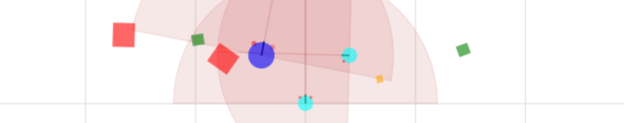

Then, to return the sensed entities by left and right proximeters, we can use the `sensed_entities` function of the agents. This returns the left and right entities if they are sensed, and `None` otherwise. 

In [70]:
ent_left, ent_right = agent_2.sensed_entities()

We can check what are the entities detected by a agent by running the following cell. Let's analyze it with more details. First, we print infos for the left entity. We start by ensuring it exists with ``ìf ent_left:``, because it is possible there are no entity sensed at the left of our agent, and this value would therefore be `None`. Then if the entity exists, we print its infos with the `print_infos()` function, else we just print that there are no entity sensed on this side.

In [ ]:
# Print the infos of the sensed entities
print("Left entity:")
if ent_left:
    ent_left.print_infos()
else:
    print("No entity sensed")

print("\nRight entity:")
if ent_right:
    ent_right.print_infos()

else:
    print("No entity sensed")

You can also directly sense specific attributes of these sensed entities with the `sense_attributes` function. Make sure to specify the `sensed_attribute` you want to sense (e.g 'diameter', 'species', etc.). You can also specify the `default_value` value to return if the attribute is not found (otherwise it is set to None). The function will return the given attribute of the left and right sensed entities if it exists (it can be either if the entity doesn't exist, or because the entity doesn't possess the specific attribute), and the default value otherwise.

For example, each entity has a diameter, so if you see a `None` value, it means that the entity isn't sensed by the agent.

In [ ]:
l_attr, r_attr = agent_2.sense_attributes(sensed_attribute="diameter")
print(f"Left: {l_attr} Right: {r_attr}")

For this other case, we only defined species for the agents. We set the default value to 'unknown', so if an entity isn't detected, or doesn't have the attribute, it will return 'unknown'.

In [ ]:
l_attr, r_attr = agent_2.sense_attributes(sensed_attribute="species", default_value="unknown")
print(f"Left: {l_attr} Right: {r_attr}")

The `sense_attributes` function takes 2 arguments: the name of the attribute we are interested in (here `"species"`) and the default value to return if a proximeter is not sensing any entity (here `none`). Note that this function works with any type of sensed entities, that is to say agents and any kind of objects.

Move the agent 2 in the scene by activating its behaviors, and check how the attribute sensing is changing accordingly by re-executing the two above cells. Then try with other attributes, for example by setting an `age` attribute to the agents and sensing it from the proximeters.

Let's now extend the `fear` behavior so that mouses are only afraid by the cat but not by the other mouse:

In [75]:
def fear_cat(agent):
    (left, right) = agent.sensors(sensed_entities=["agents"])
    left_species, right_species = agent.sense_attributes(sensed_attribute="species", default_value ="none")
    left_activation = left if left_species == "cat" else 0
    right_activation = right if right_species == "cat" else 0
    return left_activation, right_activation

Attach the obstacle avoidance on each agents to make them move.

In [76]:
for agent in controller.agents:
    agent.attach_behavior(obstacle_avoidance)

And run this behavior together with the `obstacle_avoidance` one on `agent_2`:

In [ ]:
agent_2.attach_behavior(fear_cat)
agent_2.print_behaviors()

Check in the simulator that `agent_2` (mouse) is now avoiding `agent_0` (cat) but not `agent_1` (mouse). We can modify the `species` attribute of agents on the fly. Let's swap the species of `agent_0` and `agent_1`:

In [79]:
agent_0.species = "mouse"
agent_0.diameter = 7.
agent_0.color = "green"

agent_1.species = "cat"
agent_1.diameter = 12.
agent_1.color = "blue"

Check in the simulator that `agent_2` (cyan mouse) is now avoiding `agent_1` (cat) but not `agent_0` (green mouse).

**Q6:** Use the new functionalities we have seen in this session to design the following system:
Two agents are equipped with behaviors to avoid obstacle and catch resourcess, as well as being attracted or repulsed by the other agent. Attraction and repulsion depend on the energy level of the other agent: the higher this level the more attraction, the lower this level the more repulsion. 

In [80]:
# first detach all the behaviors
for agent in controller.agents:
    agent.detach_all_behaviors(stop_motors=True)

In [47]:
# Your code here


**Q7**: Modify the previous simulation such that attraction and repulsion depend on how much a agent has been close to others in the recent past. To do so, define a `social_drive` routine that modulates the value of a `social_need` attribute in each agent. This social need continuously increases when other agents are far and decreases when a agent comes closer to its conspecifics.

In [81]:
# Your code here

In [ ]:
stop_server_and_interface(safe_mode=False)
controller.stop()

Now that you finished this session, you can either jump to :

- [session 5](session_5_logging.ipynb) : How to log and plot data about the simulation 
- [session 6](session_6_bonus.ipynb) : Bonus session that explains how to use routines to a simple Eco-Evolutionary simulation

## About the mini-project

The aim of the mini project is to show that you have understood all the concepts we have seen during these three practical sessions and that you can integrate them in a single demo. You can of course modify the V-REP scene at your will, e.g adding cups or trees. Don't forget to save you modified V-REP scene (`File -> Save scene as` in V-REP). You can start your project in a new Jupyter Notebook (`File -> New notebook -> Python3`) in the menu bar at the top of this notebook). Use both text cells (explaining what you are doing) and code cells (with the corresponding code to execute).

Therefore, your project will consists of two files: a V-REP scene (extension `.ttt`) a Jupyter Notebook (extension `.ipynb`). Don't forget to save them, e.g. on a USB stick, before logging out from the UPF computers. See [this slide](https://docs.google.com/presentation/d/1FlAUyvNynYU4mDBE2o20pf2Bn5PC_9Id3SK8sCMfr-Q/edit#slide=id.g34900c6ead_0_0) for more information on the mini-project.